# synpuf disclosure risk

Compare synthetic PUFs trained from a 10% sample, both to the training set and a 10% holdout. Synthetic file (1) is from synthimpute random forests; (2) is from the synthpop R package.

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import synthimpute as si
from scipy import stats

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

### Graphing

In [2]:
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
mpl.font_manager._rebuild()

--2018-12-19 20:28:38--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 192.30.255.112, 192.30.255.113
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2018-12-19 20:28:38--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf: No such file or directory/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Roboto-Regular.ttf: No such file or directory

Cannot write to '/usr/local

In [3]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Load data

In [4]:
synth = pd.read_csv('~/Downloads/puf_synth_10p_sample.csv')
synthpop = pd.read_csv('~/Downloads/synthpop_samp.csv')
train = pd.read_csv('~/Downloads/puf_10p_sample_train.csv')
test = pd.read_csv('~/Downloads/puf_10p_sample_test.csv')

## Preprocessing

Drop calculated features used as seeds, and drop s006.

In [5]:
synth.drop(['E00100', 'E09600', 'S006'], axis=1, inplace=True)
train.drop(['E00100', 'E09600', 'S006'], axis=1, inplace=True)
test.drop(['E00100', 'E09600', 'S006'], axis=1, inplace=True)
synthpop = synthpop[synth.columns]

In [6]:
synthpop = synthpop[synth.columns]

Check pending https://github.com/MaxGhenis/synthimpute/issues/8.

In [7]:
synth.reset_index(drop=True, inplace=True)
synthpop.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [8]:
# TODO: Do this in the file creation.
def add_subtracted_features(df):
    df['E00600'] = df.E00650 + df.e00600_minus_e00650
    df['E01500'] = df.E01700 + df.e01500_minus_e01700
    df.drop(['e00600_minus_e00650', 'e01500_minus_e01700'], axis=1, inplace=True)
    
add_subtracted_features(train)
add_subtracted_features(test)

## Comparisons

Compare nearest standardized Euclidean distance.

In [9]:
BLOCKS = ['MARS', 'DSI', 'XTOT']  # Reduce after optimizing.

In [10]:
%%time
nearest = si.nearest_synth_train_test(synth, train, test, BLOCKS, metric='euclidean')

Running block 1 of 15...
Running block 2 of 15...
Running block 3 of 15...
Running block 4 of 15...
Running block 5 of 15...
Running block 6 of 15...
Running block 7 of 15...
Running block 8 of 15...
Running block 9 of 15...
Running block 10 of 15...
Running block 11 of 15...
Running block 12 of 15...
Running block 13 of 15...
Running block 14 of 15...
Running block 15 of 15...
Running block 1 of 15...
Running block 2 of 15...
Running block 3 of 15...
Running block 4 of 15...
Running block 5 of 15...
Running block 6 of 15...
Running block 7 of 15...
Running block 8 of 15...
Running block 9 of 15...
Running block 10 of 15...
Running block 11 of 15...
Running block 12 of 15...
Running block 13 of 15...
Running block 14 of 15...
Running block 15 of 15...
CPU times: user 2min 27s, sys: 33.9 s, total: 3min 1s
Wall time: 2min 36s


In [11]:
nearest[['train_dist', 'dist_diff']].describe()

,train_dist,dist_diff
count,16378.000000,16378.000000
mean,4.665828,-0.014609
std,5.355875,0.699312
min,1.667866,-21.947663
25%,2.517457,-0.058636
50%,3.218823,-0.000346
75%,4.983165,0.020889
max,114.952878,23.887144


In [12]:
stats.ttest_1samp(nearest.dist_diff, 0)

Ttest_1sampResult(statistic=-2.6734431664785268, pvalue=0.0075151436887846085)

In [13]:
nearest.sort_values('train_dist').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
7730,7730,1.667866,6175,1.680074,13544,-0.012209,0.992733
6075,6075,1.673907,6175,1.686012,13544,-0.012105,0.992820
7345,7345,1.683069,6175,1.695168,13544,-0.012099,0.992862
3317,3317,1.694241,6175,1.706262,13544,-0.012020,0.992955
11467,11467,1.698068,6175,1.710062,13544,-0.011993,0.992987


In [14]:
nearest.sort_values('dist_diff').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
8415,8415,41.359849,4925,63.307511,15511,-21.947663,0.653317
1122,1122,5.806112,4897,20.044791,12439,-14.238679,0.289657
7396,7396,96.676206,13910,110.494052,5306,-13.817845,0.874945
13930,13930,35.659389,5855,46.216573,9060,-10.557184,0.771571
13811,13811,38.850973,7918,48.441672,4307,-9.590699,0.802016


## Compare to synthpop

In [15]:
%%time
nearest2 = si.nearest_synth_train_test(synthpop, train, test, BLOCKS, metric='euclidean')

Running block 1 of 14...
Running block 2 of 14...
Running block 3 of 14...
Running block 4 of 14...
Running block 5 of 14...
Running block 6 of 14...
Running block 7 of 14...
Running block 8 of 14...
Running block 9 of 14...
Running block 10 of 14...
Running block 11 of 14...
Running block 12 of 14...
Running block 13 of 14...
Running block 14 of 14...
Running block 1 of 14...
Running block 2 of 14...
Running block 3 of 14...
Running block 4 of 14...
Running block 5 of 14...
Running block 6 of 14...
Running block 7 of 14...
Running block 8 of 14...
Running block 9 of 14...
Running block 10 of 14...
Running block 11 of 14...
Running block 12 of 14...
Running block 13 of 14...
Running block 14 of 14...
CPU times: user 2min 19s, sys: 29.9 s, total: 2min 49s
Wall time: 2min 23s


In [16]:
nearest2[['train_dist', 'dist_diff']].describe()

,train_dist,dist_diff
count,16376.000000,16376.000000
mean,4.604040,-0.019310
std,4.804593,0.701738
min,1.680841,-12.314005
25%,2.521125,-0.060789
50%,3.282315,-0.000811
75%,4.983035,0.018984
max,120.702180,22.282415


In [17]:
stats.ttest_1samp(nearest2.dist_diff, 0)

Ttest_1sampResult(statistic=-3.521392904011912, pvalue=0.00043045346350790113)

In [18]:
nearest2.sort_values('train_dist').head()

,synth_id,train_dist,train_id,test_dist,test_id,dist_diff,dist_ratio
9299,9300,1.680841,6175,1.692956,13544,-0.012115,0.992844
8598,8599,1.681363,6175,1.693474,13544,-0.012112,0.992848
6332,6332,1.683077,6175,1.695177,13544,-0.012099,0.992863
7879,7880,1.685564,6175,1.697645,13544,-0.012082,0.992883
13339,13341,1.692278,6175,1.704312,13544,-0.012034,0.992939


## Charts

### Scatterplots of distance to train and to test

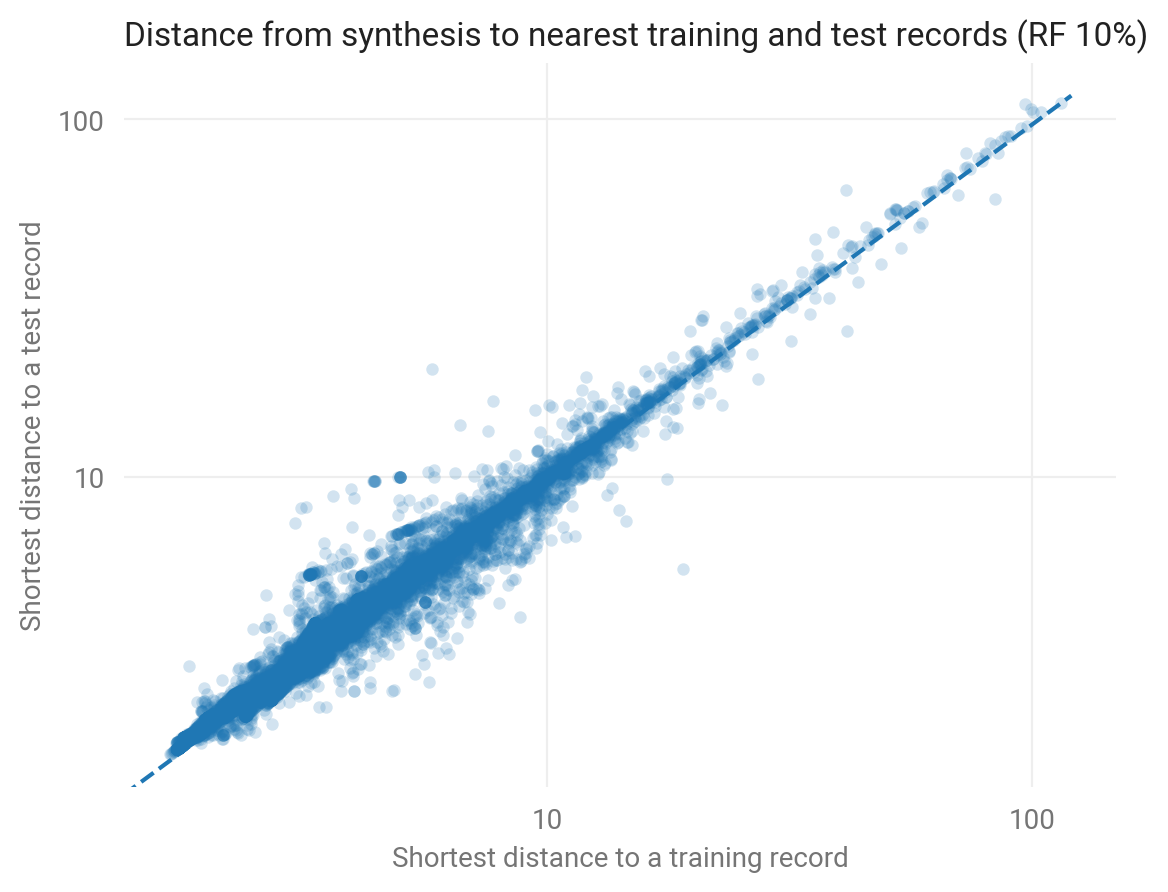

In [19]:
ax = nearest.plot.scatter('train_dist', 'test_dist', alpha=0.2, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
plt.xscale('log')
plt.yscale('log')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (RF 10%)',
          loc='left')
plt.show()

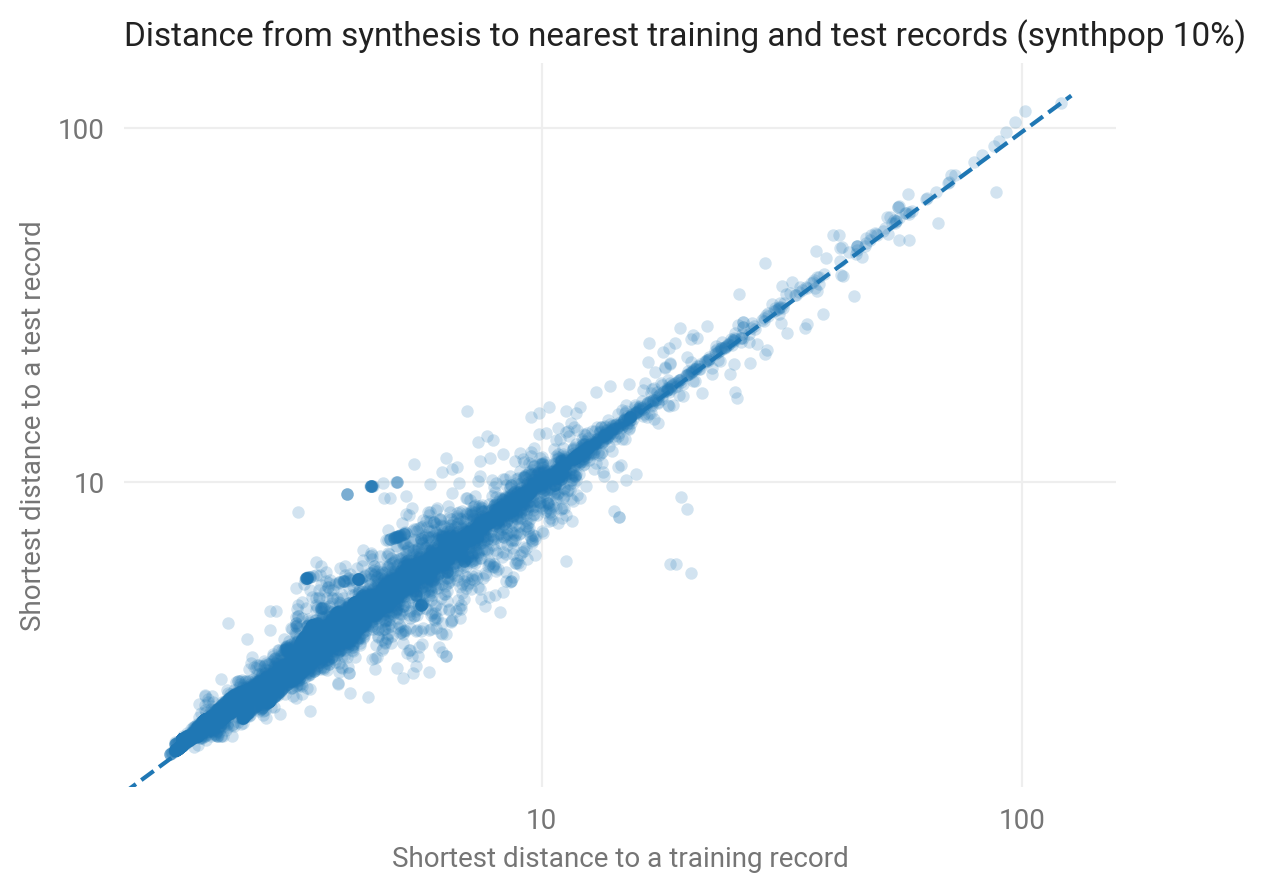

In [20]:
ax = nearest2.plot.scatter('train_dist', 'test_dist', alpha=0.2, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
plt.xscale('log')
plt.yscale('log')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (synthpop 10%)',
          loc='left')
plt.show()

### CDFs of distances

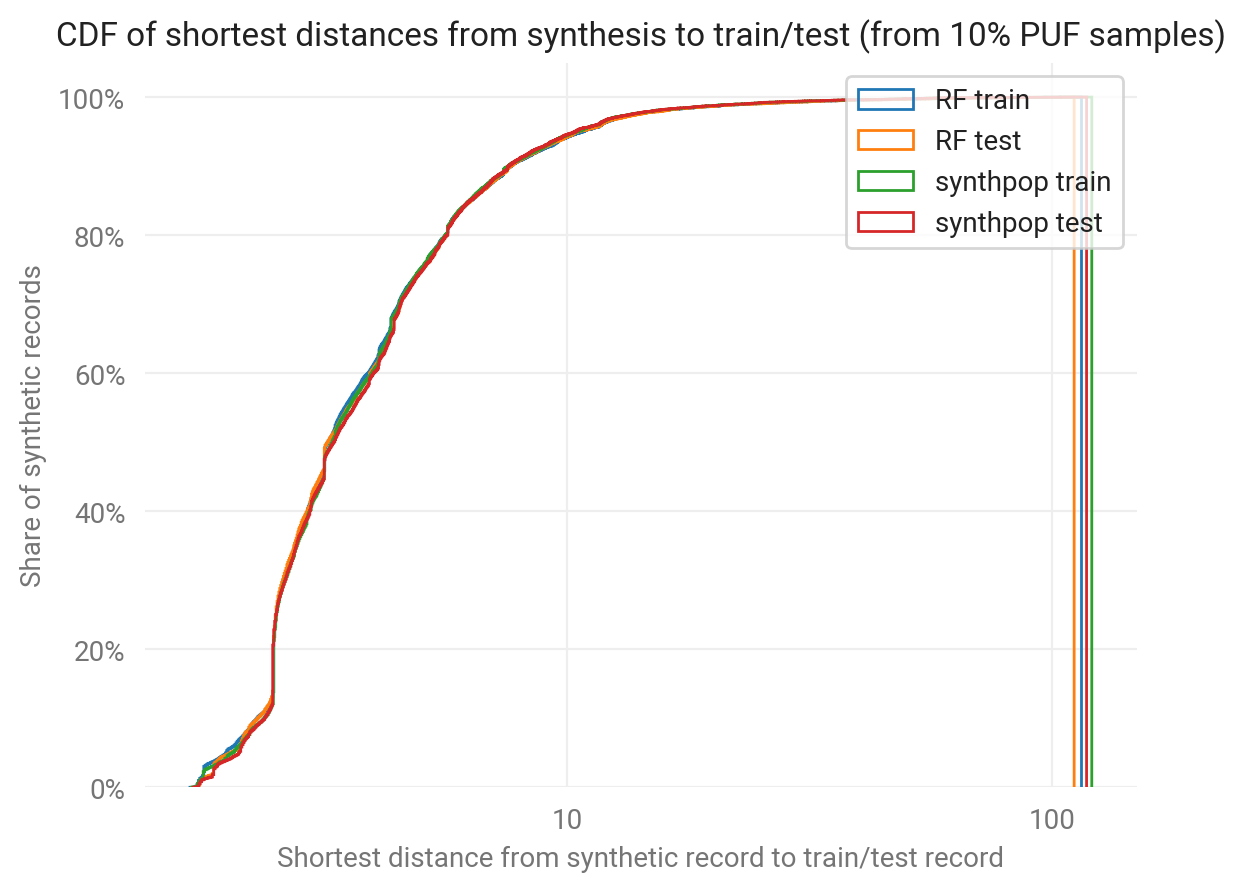

In [21]:
# Plot the four series.
ax = nearest.train_dist.hist(cumulative=True, density=1, bins=10000, histtype='step')
nearest.test_dist.hist(cumulative=True, density=1, bins=10000, histtype='step')
nearest2.train_dist.hist(cumulative=True, density=1, bins=10000, histtype='step')
nearest2.test_dist.hist(cumulative=True, density=1, bins=10000, histtype='step')
# Formatting.
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
ax.grid(color='#eeeeee')
sns.despine(left=True, bottom=True)
plt.xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.legend(['RF train', 'RF test', 'synthpop train', 'synthpop test'])
ax.set(xlabel='Shortest distance from synthetic record to train/test record',
       ylabel='Share of synthetic records')
plt.title('CDF of shortest distances from synthesis to train/test (from 10% PUF samples)')
plt.show()